In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [114]:
dfCovid = pd.read_csv('cleanLast3Months.csv')

In [115]:
dfCovid.head()

,Hong Kong,Israel/Palestine,North Korea,Russia,Trump,COVID-19,Date,Total,COVID-not-tagged,Total COVID
0,6,8,2,15,15,0,2019-12-26,421,0,0
1,4,12,5,19,7,0,2019-12-27,692,0,0
2,7,4,4,17,13,0,2019-12-28,583,0,0
3,7,4,7,8,10,0,2019-12-29,600,0,0
4,6,6,10,16,25,0,2019-12-30,656,1,1


### Posts over time - bar chart

In [116]:
# Getting lists of normal posts & COVID posts per day
normalPostsNumber = (dfCovid['Total'] - dfCovid['Total COVID']).tolist()
virusPostsNumber = dfCovid['Total COVID'].tolist()

In [117]:
# Getting a list of dates
datesList = dfCovid['Date'].tolist()

In [118]:
# Bar chart accepts numbers only
xspan = np.arange(len(datesList))

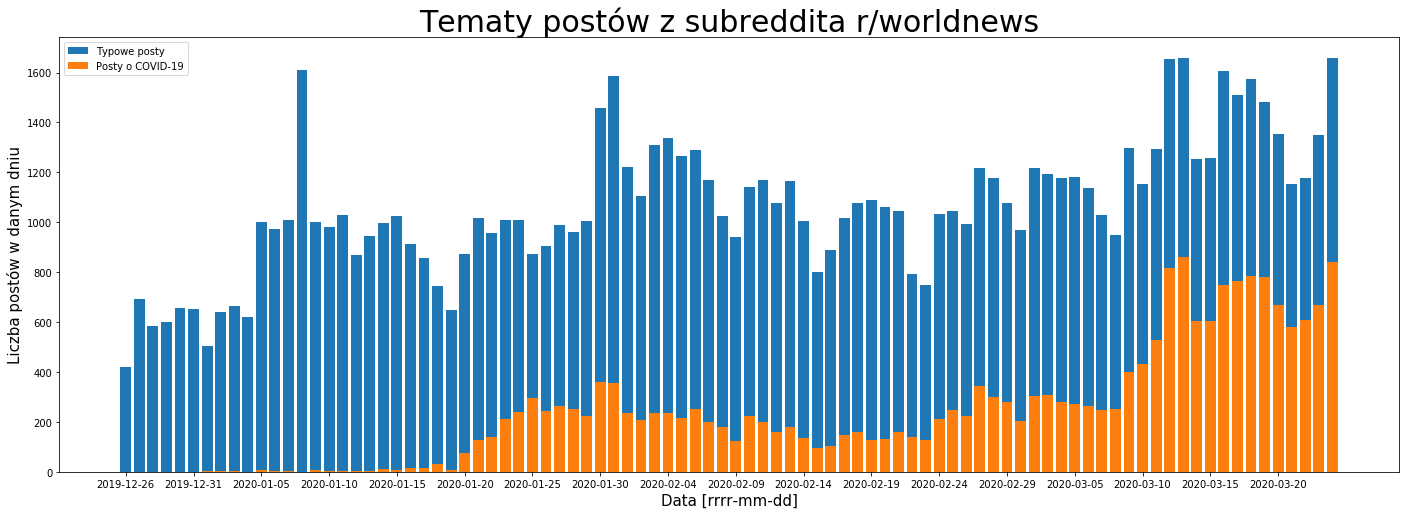

In [119]:
# Set figure's ratio
plt.figure(figsize=(24,8))

# Setting data
plt.bar(xspan, normalPostsNumber, bottom=virusPostsNumber)
plt.bar(xspan, virusPostsNumber)

# Main title
plt.title('Tematy postów z subreddita r/worldnews', fontsize=30)
# Labels for X, Y axes
plt.xlabel('Data [rrrr-mm-dd]', fontsize=15)
plt.ylabel('Liczba postów w danym dniu', fontsize=15)
# Set dates label
plt.xticks(xspan[::5], datesList[::5])
# Setting legend
plt.legend(['Typowe posty', 'Posty o COVID-19'])

plt.show()

### Posts compared with total COVID-19 cases

In [120]:
# Loading dataset with a number of total-cases over time
dfWHO = pd.read_csv('total_cases.csv')

In [121]:
# Adding 5 zeros because of 5 days shift between this dataset and reddit data (official data from before)
totalCases = 5*[0] + dfWHO['World'].tolist()[:-4]

In [122]:
# Computing aggregated number of COVID-19 posts
virusPostsAggregated = len(virusPostsNumber)*[0]
virusPostsAggregated[0] = virusPostsNumber[0]
for index, dayPosts in enumerate(virusPostsNumber[1:], start=1):
  virusPostsAggregated[index] = virusPostsAggregated[index-1] + dayPosts


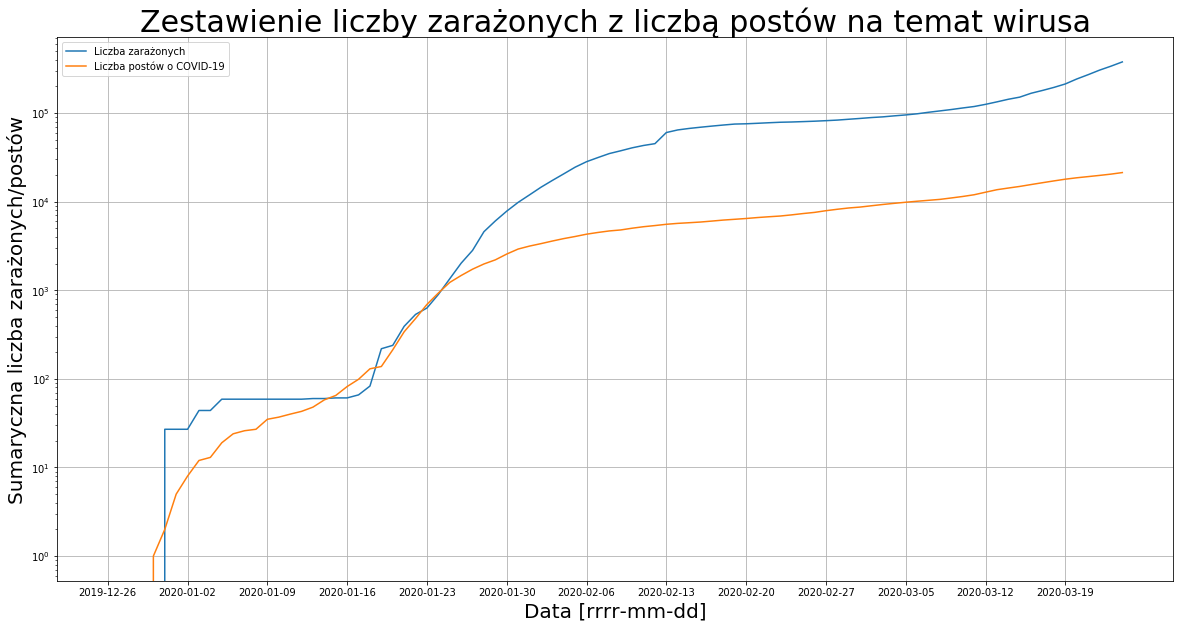

In [133]:
plt.figure(figsize=(20,10))

plt.plot(datesList, totalCases)
plt.plot(datesList, virusPostsAggregated)

# Setting logarithmic scale
plt.yscale('log')

# Main title
plt.title('Zestawienie liczby zarażonych z liczbą postów na temat wirusa', fontsize=30)
# Labels for X, Y axes
plt.xlabel('Data [rrrr-mm-dd]', fontsize=20)
plt.ylabel('Sumaryczna liczba zarażonych/postów', fontsize=20)

# Set dates label
plt.xticks(xspan[::7], datesList[::7])

# Setting legend
plt.legend(['Liczba zarażonych', 'Liczba postów o COVID-19'])

plt.grid()

plt.show()